# Baseline - Part 2: Final Dataset Model Selection

**Setup**

In [1]:
#Loading key libraries for later analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
pd.set_option('max_colwidth', 1000)
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error
!pip install xgboost
!pip install spacy
import sklearn   
import scipy.io as scio
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import functions


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [2]:
#Read in bank transactions
Train = pd.read_csv(r'Train_trad.csv',low_memory=False,encoding='latin1')
Test = pd.read_csv(r'Test_trad.csv',low_memory=False,encoding='latin1')

In [3]:
#Prepare Final DataFrame
Train.index = Train['Unnamed: 0'].values
Train = functions.drop_column(Train,['Unnamed: 0','local_rule_creation_date'])
Test.index = Test['Unnamed: 0'].values
Test = functions.drop_column(Test,['Unnamed: 0','local_rule_creation_date'])

In [5]:
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]
y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

## 1. Model Selection

### 1.1 Benchmark models

In [2]:
#Cross validation and the scores used for evaluation and comparison
kfold = StratifiedKFold(n_splits=5,random_state=200,shuffle=True)
scoring = ('accuracy','precision_macro','recall_macro','f1_macro')

#Benchmark models with default settings
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(max_iter = 250000),
    ExtraTreesClassifier(),
    GaussianNB(),
    BernoulliNB(),
    SVC(),
    XGBClassifier(),
    KNeighborsClassifier(),
    MLPClassifier()
]

results = list()

#fit and train the training set with 5 fold cross validation to get its scores
for model in classifiers:
    model.seed = 20
    
    scores = cross_validate(model, X_train, y_train, cv=kfold, scoring= scoring, n_jobs = -1)
    sorted(scores.keys())
    accuracy = scores['test_accuracy'].mean()
    precision_macro = scores['test_precision_macro'].mean()
    recall_macro = scores['test_recall_macro'].mean()
    f1_macro = scores['test_f1_macro'].mean()
    score_description = 'Accuracy: {},Precision: {},Recall: {},F1 Score: {}'.format(round(accuracy,5),round(precision_macro,5),
                                                                                    round(recall_macro,5),round(f1_macro,5))
    results.append({'accuracy':accuracy ,'precision':precision_macro, 'recall':recall_macro ,'f1_score':f1_macro})
    print('{model:25} CV-5: {score}'.format(
    model=model.__class__.__name__,
    score=score_description
 ))

RandomForestClassifier    CV-5: Accuracy: 0.96202,Precision: 0.96515,Recall: 0.9262,F1 Score: 0.94036
LogisticRegression        CV-5: Accuracy: 0.95945,Precision: 0.96628,Recall: 0.92518,F1 Score: 0.94053
ExtraTreesClassifier      CV-5: Accuracy: 0.96267,Precision: 0.96528,Recall: 0.92637,F1 Score: 0.94025
GaussianNB                CV-5: Accuracy: 0.86289,Precision: 0.72854,Recall: 0.91322,F1 Score: 0.77494
SVC                       CV-5: Accuracy: 0.93933,Precision: 0.96426,Recall: 0.86846,F1 Score: 0.89992
XGBClassifier             CV-5: Accuracy: 0.9588,Precision: 0.95565,Recall: 0.9023,F1 Score: 0.92185
KNeighborsClassifier      CV-5: Accuracy: 0.92501,Precision: 0.94032,Recall: 0.86008,F1 Score: 0.8896
MLPClassifier             CV-5: Accuracy: 0.95703,Precision: 0.96961,Recall: 0.91888,F1 Score: 0.93879


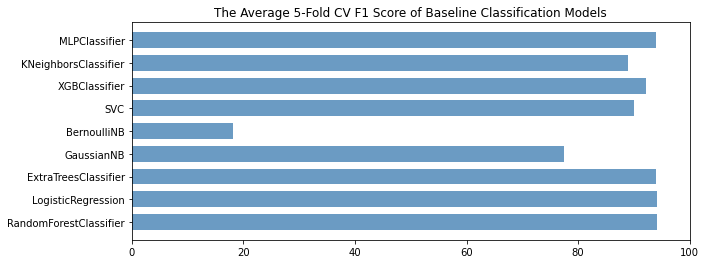

In [30]:
a = pd.DataFrame(results)
model = ['RandomForestClassifier','LogisticRegression','ExtraTreesClassifier','GaussianNB','BernoulliNB','SVC','XGBClassifier'
         ,'KNeighborsClassifier','MLPClassifier']
plt.figure(figsize=(10,4))

# Plot the score of each model
plt.barh(range(9), (a['f1_score'].values)*100, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(9), model)
plt.xlim(0,100)
plt.title("The Average 5-Fold CV F1 Score of Baseline Classification Models")
plt.savefig(r'CV Score of class Model_trad.png',bbox_inches='tight')

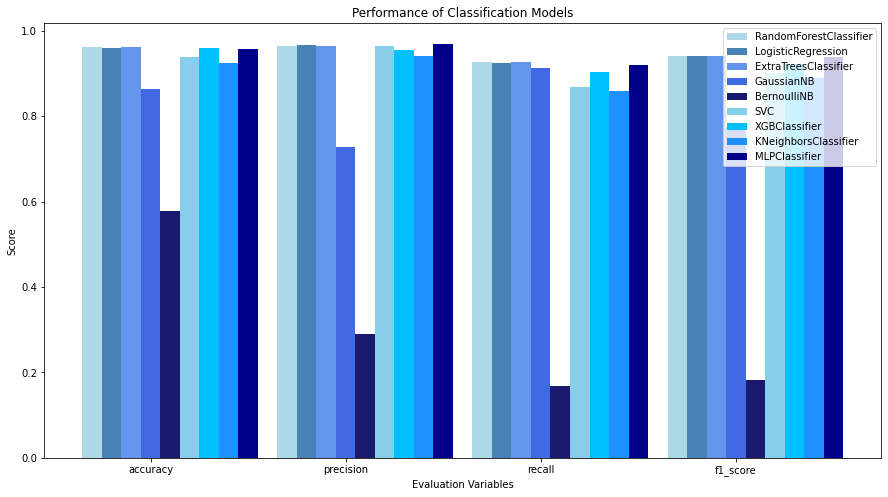

In [38]:
a = pd.DataFrame(results)
model = ['RandomForestClassifier','LogisticRegression','ExtraTreesClassifier','GaussianNB','BernoulliNB','SVC','XGBClassifier',
        'KNeighborsClassifier','MLPClassifier']

fig, ax = plt.subplots(figsize=(15,8))
width = 0.1

# Plot the score of each model
X = np.arange(4)
plt.bar(X + 0.00, a.loc[0], color = 'lightblue', width = width,label=model[0])
plt.bar(X + width, a.loc[1], color = 'steelblue', width = width,label=model[1])
plt.bar(X + width*2, a.loc[2], color = 'cornflowerblue', width = width,label=model[2])
plt.bar(X + width*3, a.loc[3], color = 'royalblue', width = width,label=model[3])
plt.bar(X + width*4, a.loc[4], color = 'midnightblue', width = width,label=model[4])
plt.bar(X + width*5, a.loc[5], color = 'skyblue', width =width,label=model[5])
plt.bar(X + width*6, a.loc[6], color = 'deepskyblue', width = width,label=model[6])
plt.bar(X + width*7, a.loc[7], color = 'dodgerblue', width = width,label=model[7])
plt.bar(X + width*8, a.loc[8], color = 'darkblue', width = width,label=model[8])

ax.set_xticks([0.3,1.3,2.3,3.3])
ax.set_xticklabels(a.columns)
plt.xlabel('Evaluation Variables')
plt.ylabel('Score')
plt.title("Performance of Classification Models")
plt.legend()

plt.savefig(r'Performance of class models_Trad.png',bbox_inches='tight')

## 1.2 Fine Tuning Top 4 Selected Models

In [8]:
from sklearn.model_selection import GridSearchCV
def gridsearch(model,param):
    kfold = StratifiedKFold(n_splits=5,random_state=200,shuffle=True)
    np.random.seed(0)
    clf=GridSearchCV(model,param, cv=kfold, n_jobs=-1)
    clf.fit(X_train, y_train)
    return clf.best_params_

### 1.2.1 Extra Trees

In [14]:
et = ExtraTreesClassifier()

grid_param={"n_estimators": [10, 50, 100, 200], 
           "max_features": ["auto","sqrt","log2"],
           "max_depth": [None,10, 30, 50], 
           "min_samples_split": [2,5,10],
           "min_samples_leaf": [1,2,5]}

gridsearch(et,grid_param)

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

### 1.2.2 Random Forest Classifier

In [15]:
rf = RandomForestClassifier()

grid_param={"n_estimators": [1,10,50,100], 
           "max_features": ["auto","sqrt","log2"],
           "max_depth": [None,10,30,50,70], 
           "min_samples_split": [2,10,30],
           "min_samples_leaf": [1,10,30]}

gridsearch(rf,grid_param)

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

### 1.2.3 LogisticRegression

In [31]:
lr = LogisticRegression(max_iter = 250000)

grid_param={"class_weight": ['balanced',None],
            "solver": ['newton-cg','sag','saga']}

gridsearch(lr,grid_param)

{'class_weight': None, 'solver': 'saga'}

### 1.2.4 MLP

In [32]:
mlp = MLPClassifier()

grid_param = {
    'hidden_layer_sizes': [(100,),(100,100),(200,200)],
    'activation': ['tanh', 'relu','logistic'],
    'alpha': [0.0001, 0.05],
}
gridsearch(mlp,grid_param)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (200, 200)}

## 1.3 Results of Top Performanced Classifiers

In [7]:
from sklearn.neural_network import MLPClassifier
kfold = StratifiedKFold(n_splits=5,random_state=200,shuffle=True)
scoring = ('accuracy','precision_macro','recall_macro','f1_macro')

classifiers = [
    RandomForestClassifier(max_depth= None,max_features='auto',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 50),
    LogisticRegression(class_weight= None, solver= 'saga',max_iter = 250000),
    ExtraTreesClassifier(max_depth= None,max_features='auto',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 200),
    MLPClassifier(activation= 'relu',alpha= 0.05,hidden_layer_sizes= (200,200))
]

results_post_tune = list()

for model in classifiers:
    model.seed = 20
    
    scores = cross_validate(model, X_train, y_train, cv=kfold, scoring= scoring, n_jobs = -1)
    sorted(scores.keys())
    accuracy = scores['test_accuracy'].mean()
    precision_macro = scores['test_precision_macro'].mean()
    recall_macro = scores['test_recall_macro'].mean()
    f1_macro = scores['test_f1_macro'].mean()
    score_description = 'Accuracy: {},Precision: {},Recall: {},F1 Score: {}'.format(round(accuracy,5),round(precision_macro,5),
                                                                                    round(recall_macro,5),round(f1_macro,5))
    results_post_tune.append({'accuracy':accuracy ,'precision':precision_macro, 'recall':recall_macro ,'f1_score':f1_macro})
    print('{model:25} CV-5: {score}'.format(
    model=model.__class__.__name__,
    score=score_description
 ))

RandomForestClassifier    CV-5: Accuracy: 0.96218,Precision: 0.96587,Recall: 0.92554,F1 Score: 0.94031
LogisticRegression        CV-5: Accuracy: 0.95961,Precision: 0.96803,Recall: 0.925,F1 Score: 0.94138
ExtraTreesClassifier      CV-5: Accuracy: 0.9617,Precision: 0.96412,Recall: 0.9267,F1 Score: 0.93998
MLPClassifier             CV-5: Accuracy: 0.96315,Precision: 0.96721,Recall: 0.93144,F1 Score: 0.94436


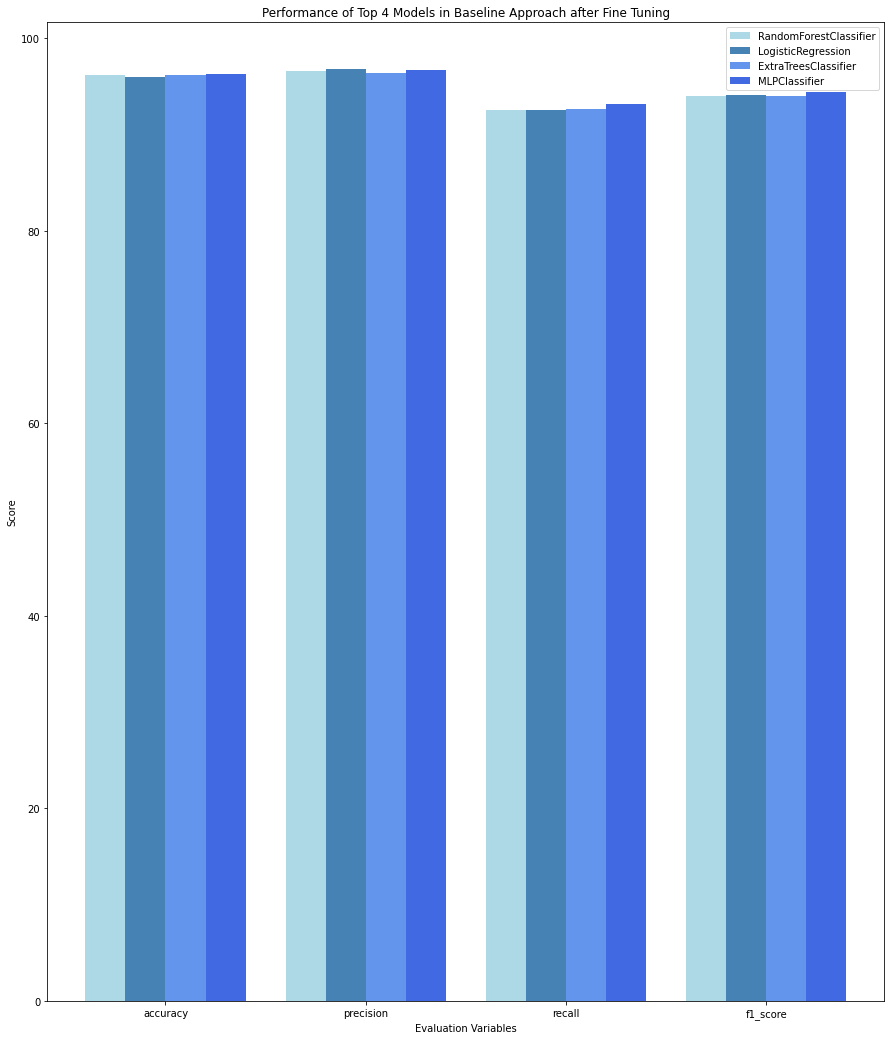

In [18]:
a = pd.DataFrame(results_post_tune)
model = ['RandomForestClassifier','LogisticRegression','ExtraTreesClassifier','MLPClassifier']

fig, ax = plt.subplots(figsize=(15,18))
width = 0.2

# Plot the score of each model
X = np.arange(4)
plt.bar(X + 0.00, a.loc[0]*100, color = 'lightblue', width = width,label=model[0])
plt.bar(X + width, a.loc[1]*100, color = 'steelblue', width = width,label=model[1])
plt.bar(X + width*2, a.loc[2]*100, color = 'cornflowerblue', width = width,label=model[2])
plt.bar(X + width*3, a.loc[3]*100, color = 'royalblue', width = width,label=model[3])

ax.set_xticks([0.3,1.3,2.3,3.3])
ax.set_xticklabels(a.columns)
plt.xlabel('Evaluation Variables')
plt.ylabel('Score')
plt.title("Performance of Top 4 Models in Baseline Approach after Fine Tuning")
plt.legend()
plt.savefig(r'Performance of Top 4 Models in Baseline Approach after Fine Tuning.png',bbox_inches='tight')